IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np

UPLOADING DATASET

LOADING DATASET

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Regression.csv.zip to Regression.csv (1).zip


In [ ]:
data=pd.read_csv('Regression.csv.zip')
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


FINDING NULL VALUES

In [ ]:
data.isnull().sum()

,0
date,0
Usage_kWh,0
Lagging_Current_Reactive.Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2(tCO2),0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0


CHECKING DATATYPE

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

REMOVING COLUMN DATE

In [ ]:
X=data.drop(['date','Day_of_week'], axis=1)
X.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Light_Load


In [ ]:
X.shape

(35040, 9)

CHECKING UNIQUE VALUES

In [ ]:
for i in range(X.shape[1]):
  print(X.iloc[:,i].unique())
  print(X.iloc[:,i].value_counts())
  print()

[ 3.17  4.    3.24 ... 21.89 17.82 45.  ]
Usage_kWh
3.06      631
2.95      609
2.92      598
3.02      560
2.88      556
         ... 
82.58       1
129.20      1
151.67      1
145.01      1
121.25      1
Name: count, Length: 3343, dtype: int64

[ 2.95  4.46  3.28 ... 69.77 74.56 70.67]
Lagging_Current_Reactive.Power_kVarh
0.00     7194
4.46      208
4.82      203
4.75      202
4.68      202
         ... 
61.27       1
85.50       1
66.64       1
52.42       1
66.10       1
Name: count, Length: 1954, dtype: int64

[ 0.    0.18 15.66 16.96 21.28 19.22 16.88 22.32 18.   16.92 23.4   5.65
  4.82  6.7   4.57 12.89 23.15 16.67 16.63 23.33 16.74 16.99 18.25 22.1
 16.7  19.33 21.35 16.81 20.45 20.77 21.64 19.19 23.51 17.39 17.35  8.96
  5.47 16.24 22.57 20.74 20.88 22.54 19.55 17.42 24.26 17.75 25.2  17.5
 10.08  0.07  0.11  0.94  1.15  0.54  0.14 18.9  25.92 25.34 25.49  6.52
  1.04  0.5   1.58  0.43  1.37  0.47  3.96 12.13 23.22 25.16 26.5  26.42
 26.46 15.44  0.04 26.21 25.56 25.74  6.08 

In [ ]:
X['WeekStatus']=X['WeekStatus'].replace({'Weekday':0,'Weekend':1})
print(X['WeekStatus'])

0        0
1        0
2        0
3        0
4        0
        ..
35035    0
35036    0
35037    0
35038    0
35039    0
Name: WeekStatus, Length: 35040, dtype: int64


/tmp/ipython-input-3607648564.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['WeekStatus']=X['WeekStatus'].replace({'Weekday':0,'Weekend':1})


In [ ]:
data1=X.iloc[:,:8]
data1.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0


In [ ]:
import pandas as pd
data=pd.read_csv('Regression.csv.zip') # Re-execute data loading
data_dummies = pd.get_dummies(data[['Load_Type']],drop_first=True)
data_dummies.head()

,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [ ]:
df=pd.concat([data1,data_dummies],axis=1)
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,False,False
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,False,False
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,False,False
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,False,False
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  int64  
 8   Load_Type_Maximum_Load                35040 non-null  bool   
 9   Load_Type_Medium_Load                 35040 non-null  bool   
dtypes: bool(2), float64(6), int64(2)
memory usage: 2.2 MB


In [ ]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,0.284932
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317,0.451388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,0.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,0.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,1.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,1.000000


In [ ]:
df.rename(columns={'Usage_kWh':'Usage','Lagging_Current_Reactive.Power_kVarh':'LaRP','Leading_Current_Reactive_Power_kVarh':'LeRP','CO2(tCO2)':'CO2','Lagging_Current_Power_Factor':'LaPF','Leading_Current_Power_Factor':'LePF','Load_Type_Light_Load':'LL','Load_Type_Maximum_Load':'MaxL','Load_Type_Medium_Load':'MinL'}, inplace=True)
df.head()

,Usage,LaRP,LeRP,CO2,LaPF,LePF,NSM,WeekStatus,MaxL,MinL
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,False,False
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,False,False
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,False,False
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,False,False
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,False,False


In [ ]:
df1 = df.copy()
df1.head()

,Usage,LaRP,LeRP,CO2,LaPF,LePF,NSM,WeekStatus,MaxL,MinL
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,False,False
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,False,False
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,False,False
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,False,False
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,False,False


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

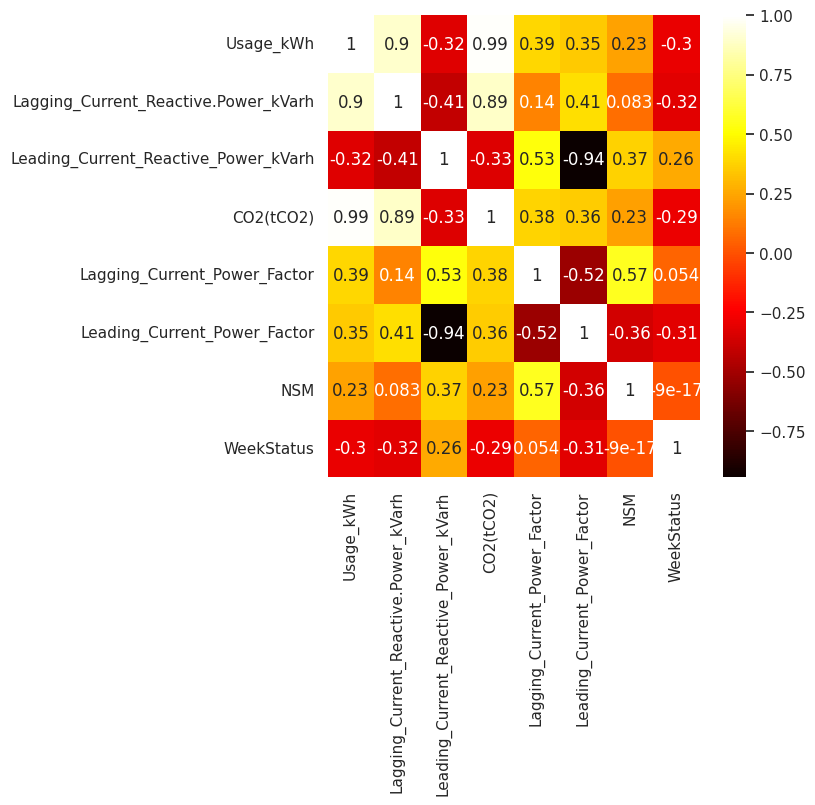

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
heatmap=sns.heatmap(data1.corr(),cmap='hot',annot=True)
heatmap

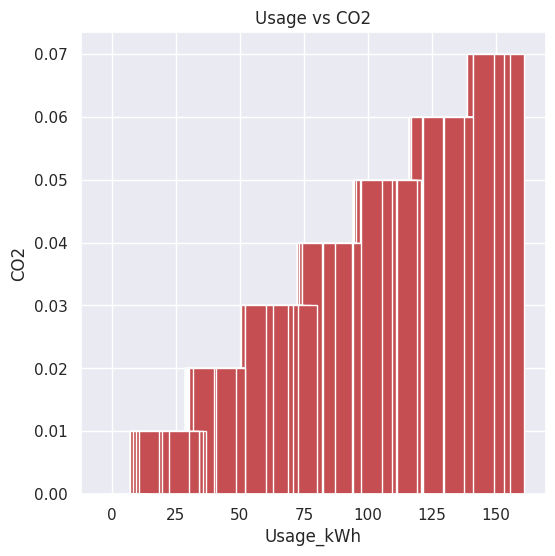

In [ ]:
plt.bar(df['Usage'],df['CO2'],color='r',width=8)
plt.xlabel('Usage_kWh')
plt.ylabel('CO2')
plt.title('Usage vs CO2')
plt.show()

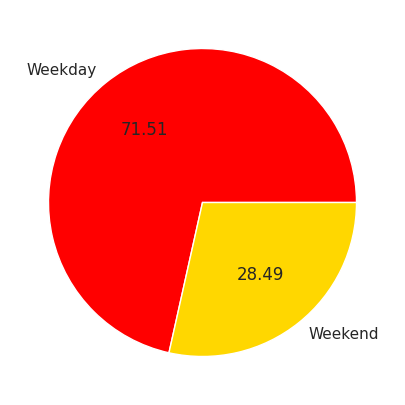

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
colors=['red','gold']
plt.pie(df['WeekStatus'].value_counts(),labels=['Weekday','Weekend'],autopct=lambda x:np.round(x,2),colors=colors)
plt.show()

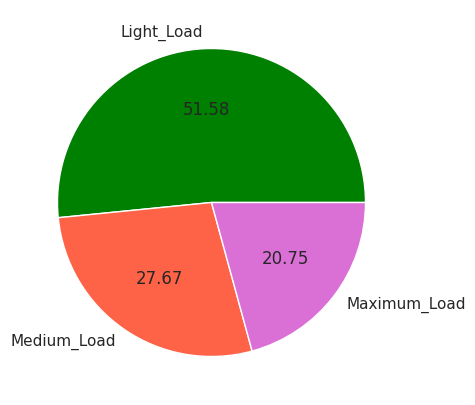

In [ ]:
plt.pie(data['Load_Type'].value_counts(),labels=['Light_Load','Medium_Load','Maximum_Load'],autopct=lambda x:np.round(x,2),colors=['green','tomato','orchid'])
plt.show()

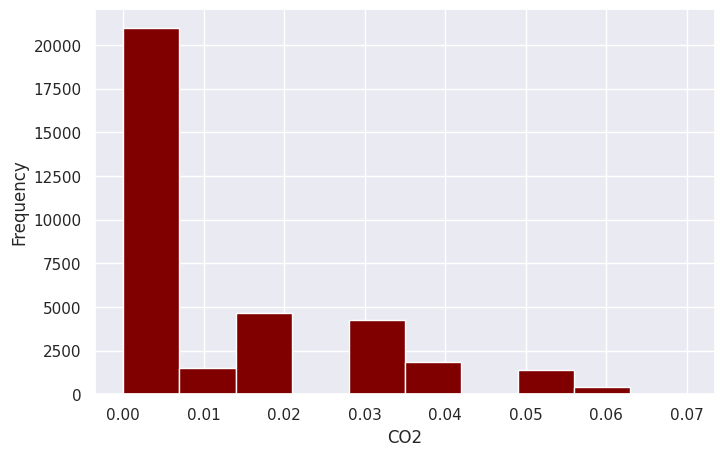

In [ ]:
plt.hist(df['CO2'],color='maroon',bins=10)
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.show()

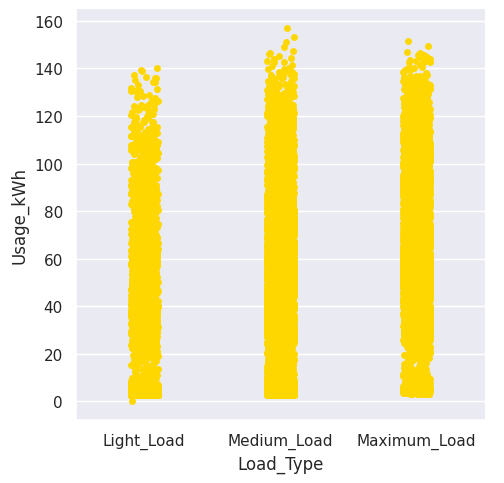

In [ ]:
catplot=sns.catplot(x='Load_Type',y='Usage_kWh',data=data,color='gold')
catplot.set_ylabels('Usage_kWh')
catplot.set_xlabels('Load_Type')
catplot

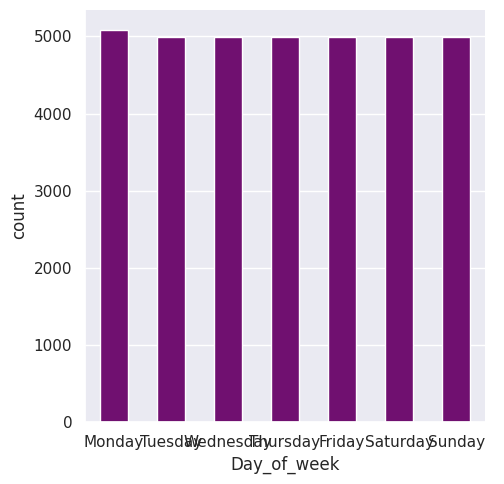

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
catplot=sns.catplot(x='Day_of_week',data=data,kind='count',width=0.5,color='purple')
catplot.set_xlabels('Day_of_week')
catplot

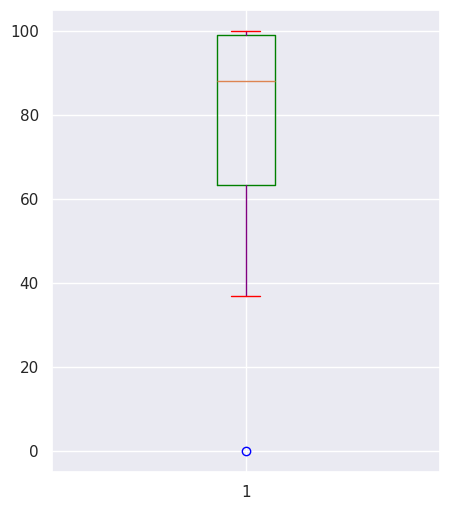

In [ ]:
sns.set(rc={'figure.figsize':(5,6)})
plt.boxplot(df.iloc[:,4],boxprops=dict(color='green'),capprops=dict(color='red'),whiskerprops=dict(color='purple'), flierprops=dict(markeredgecolor='blue'))
plt.show()

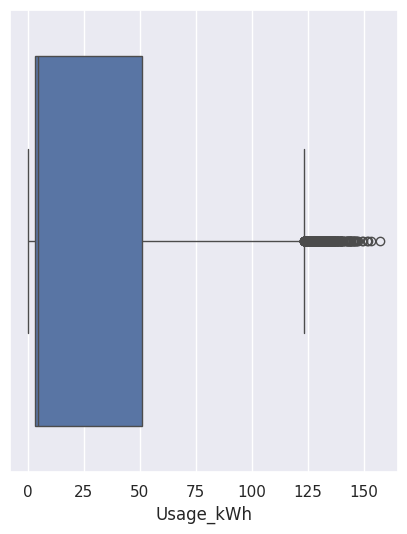

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Regression.csv.zip')
data.head()

sns.boxplot(x='Usage_kWh',data=data)
plt.show()

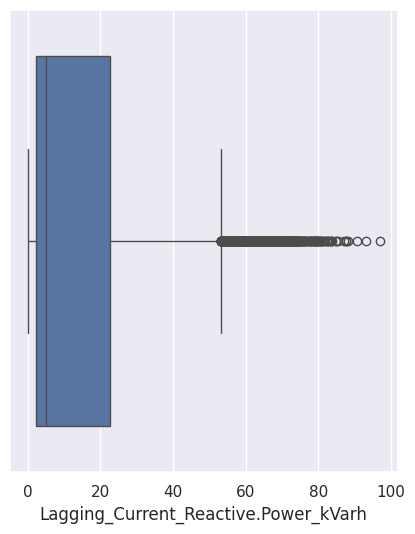

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Regression.csv.zip')
data.head()

sns.boxplot(x='Lagging_Current_Reactive.Power_kVarh',data=data)
plt.show()

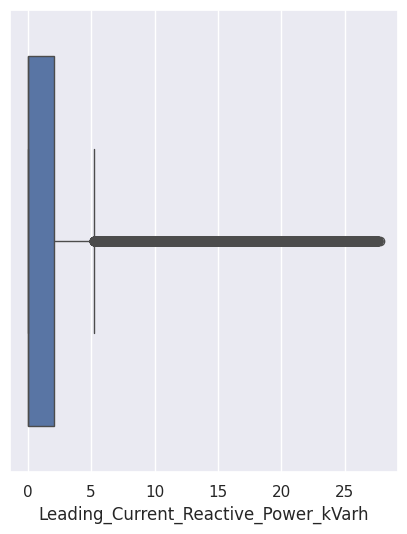

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Regression.csv.zip')
data.head()

sns.boxplot(x='Leading_Current_Reactive_Power_kVarh',data=data)
plt.show()

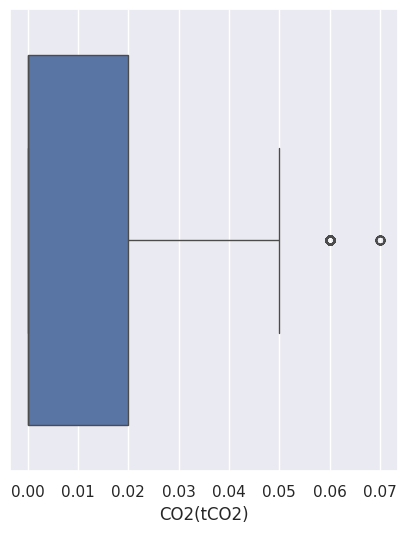

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Regression.csv.zip')
data.head()

sns.boxplot(x='CO2(tCO2)',data=data)
plt.show()

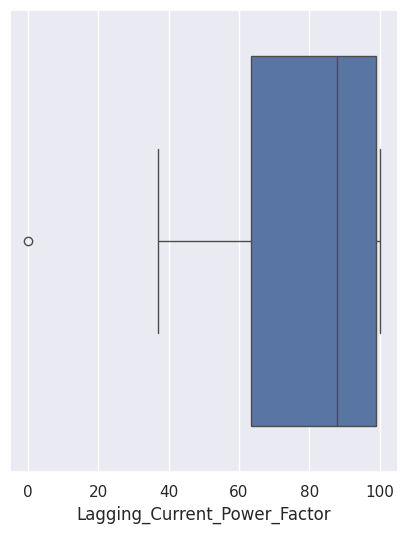

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Regression.csv.zip')
data.head()

sns.boxplot(x='Lagging_Current_Power_Factor',data=data)
plt.show()

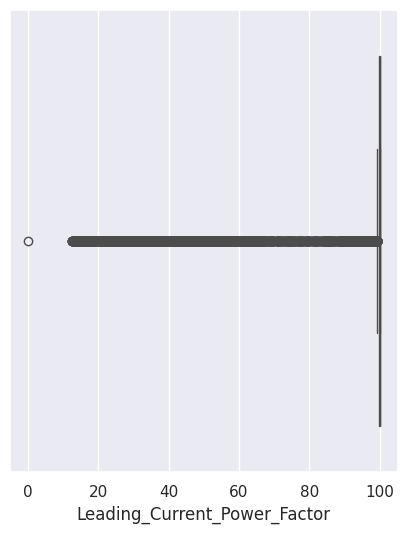

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Regression.csv.zip')
data.head()

sns.boxplot(x='Leading_Current_Power_Factor',data=data)
plt.show()

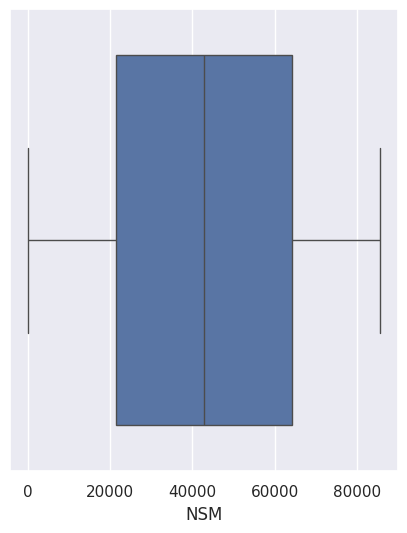

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Regression.csv.zip')
data.head()

sns.boxplot(x='NSM',data=data)
plt.show()

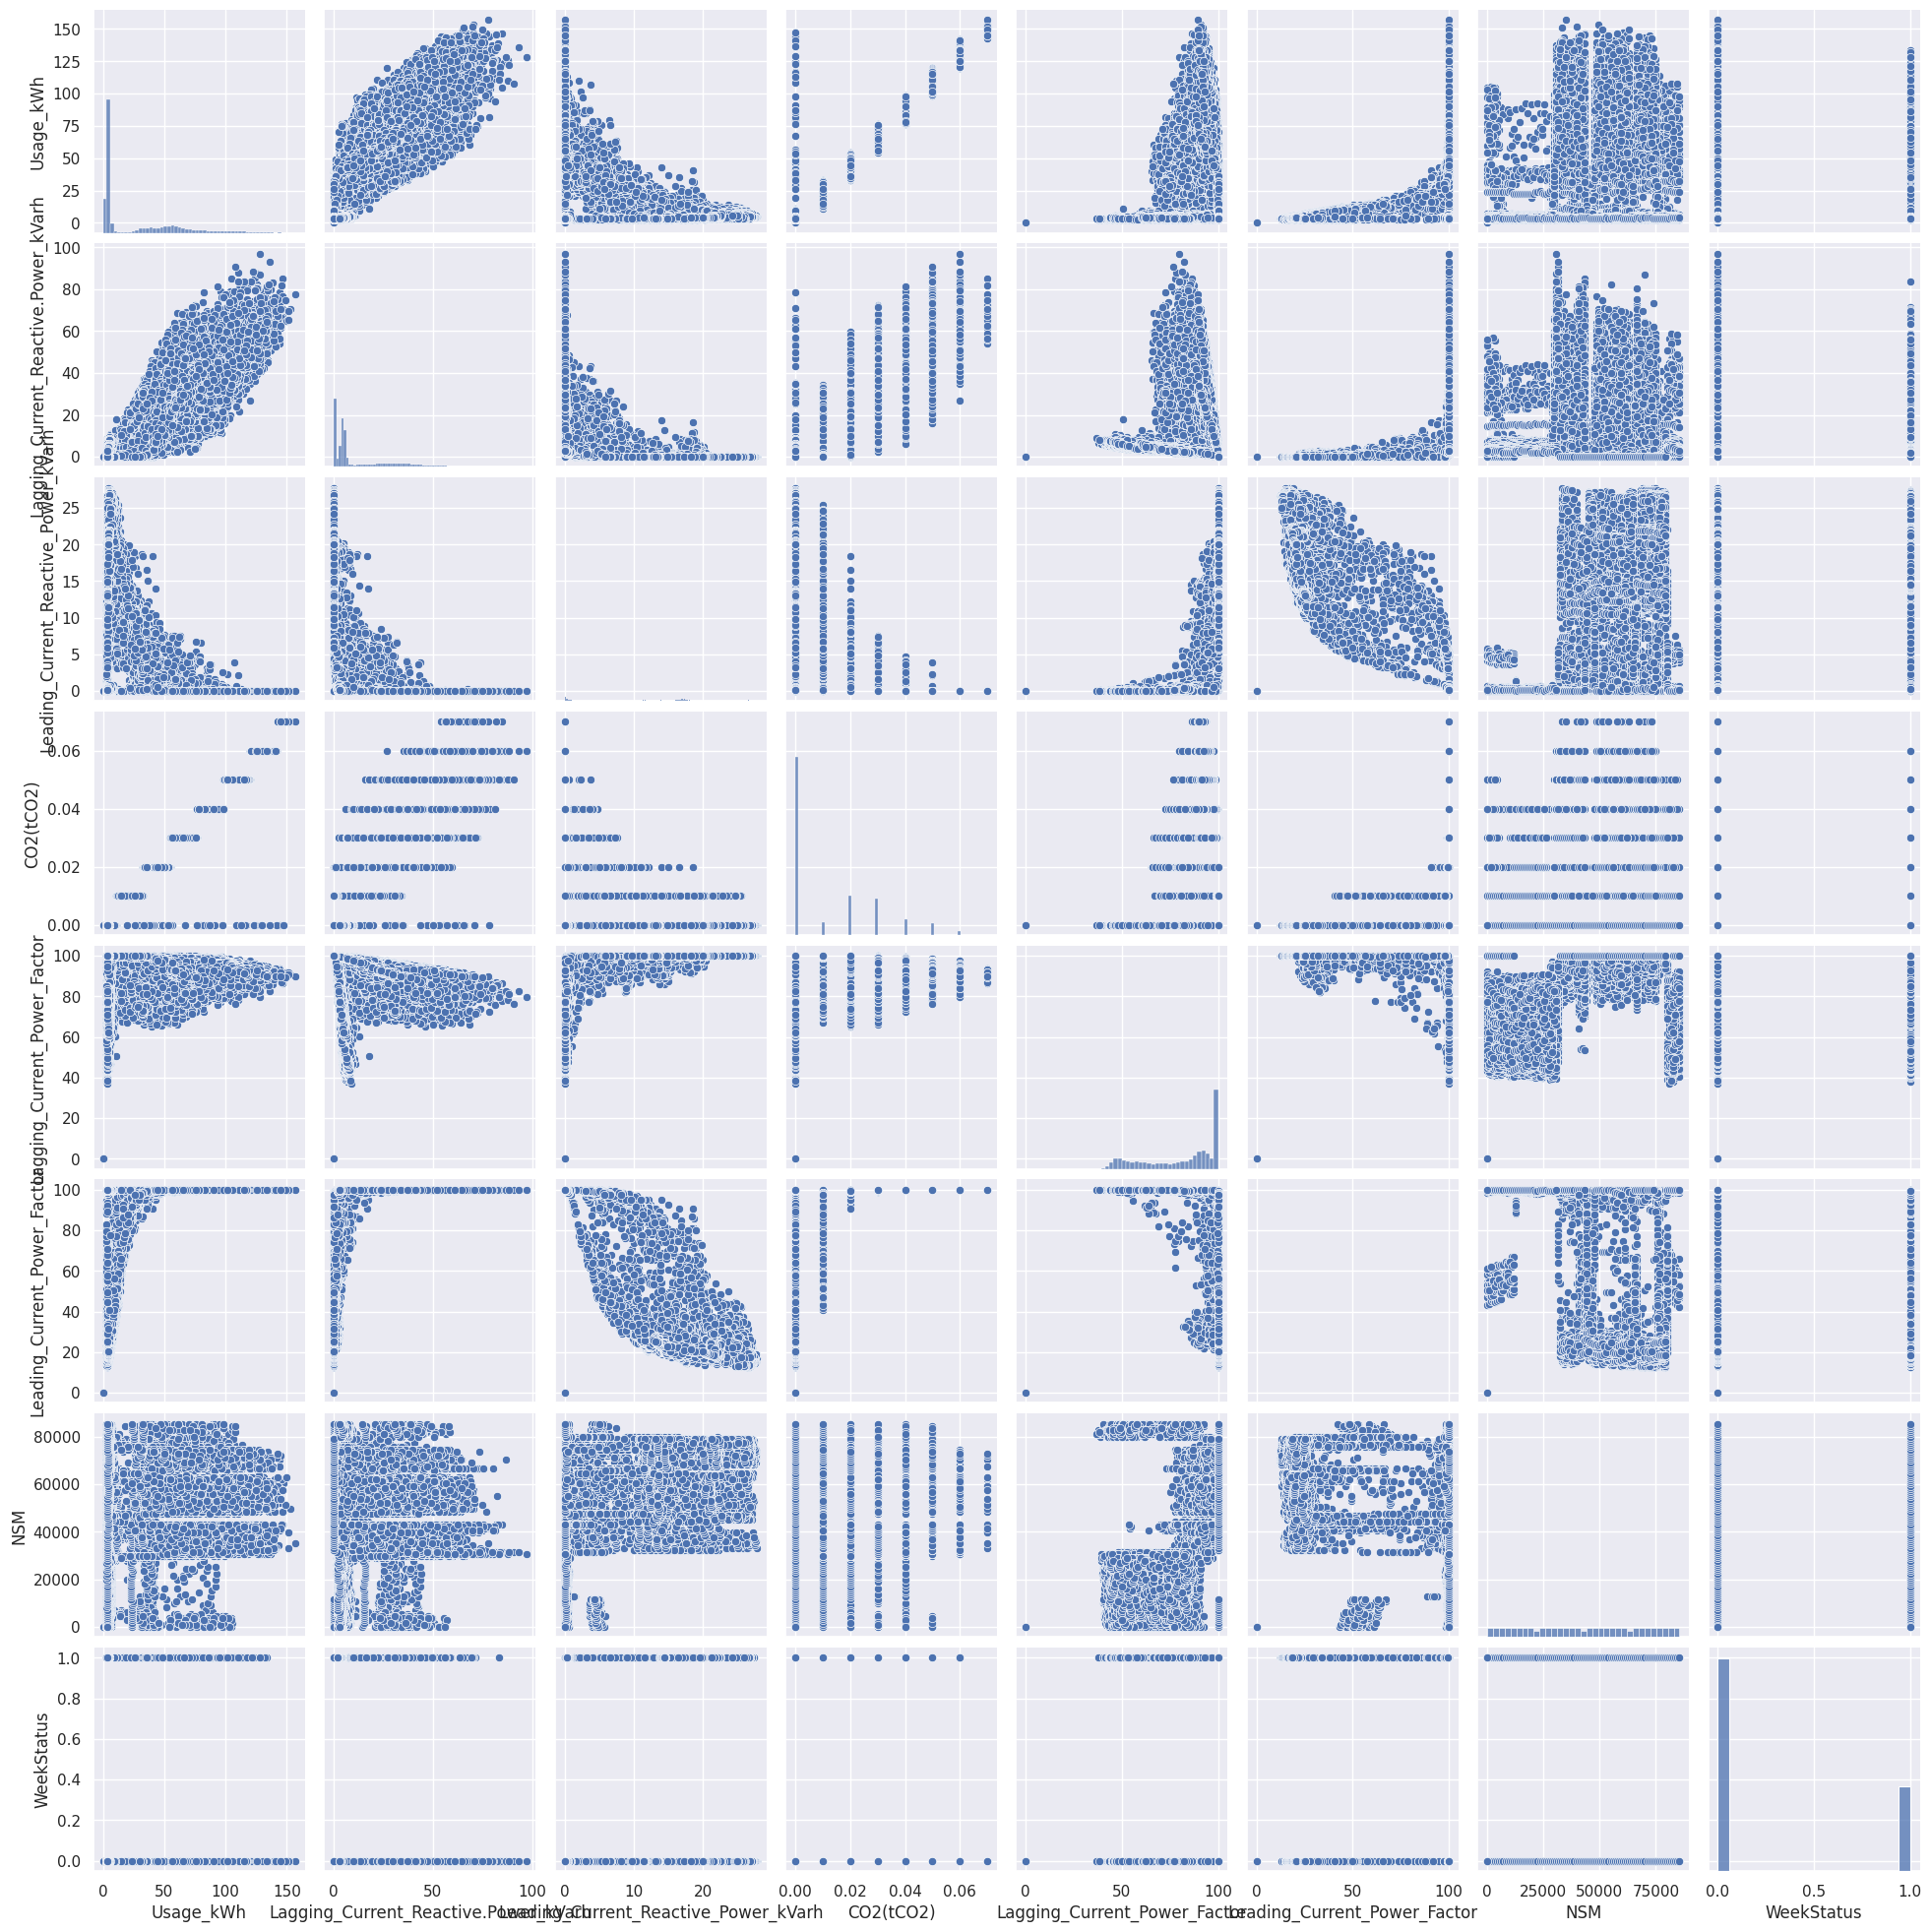

In [ ]:
sns.pairplot(X,diag_kind='hist')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


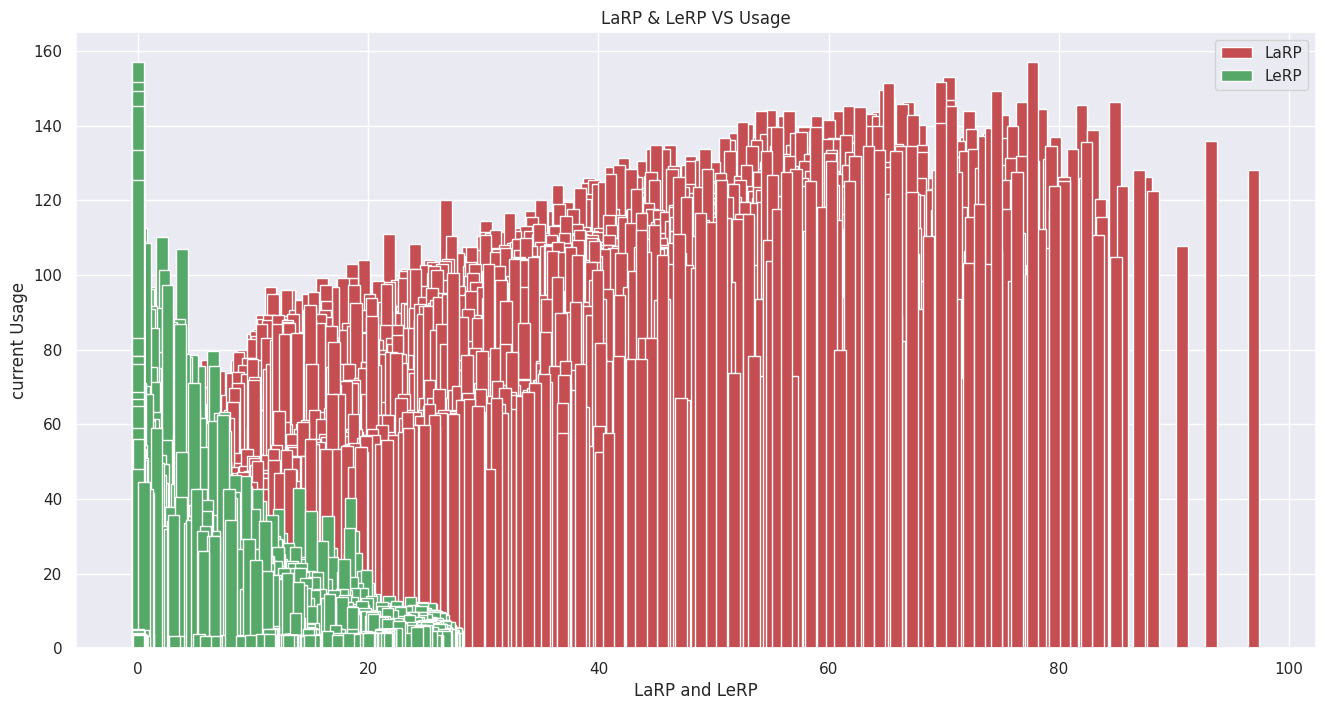

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
bar1=plt.bar(df['LaRP'],df['Usage'], color='r',width=1)
bar2=plt.bar(df['LeRP'],df['Usage'], color='g',width=1)
plt.xlabel('LaRP and LeRP')
plt.ylabel('current Usage')
plt.title('LaRP & LeRP VS Usage')
plt.legend((bar1,bar2),('LaRP','LeRP'))
plt.show()

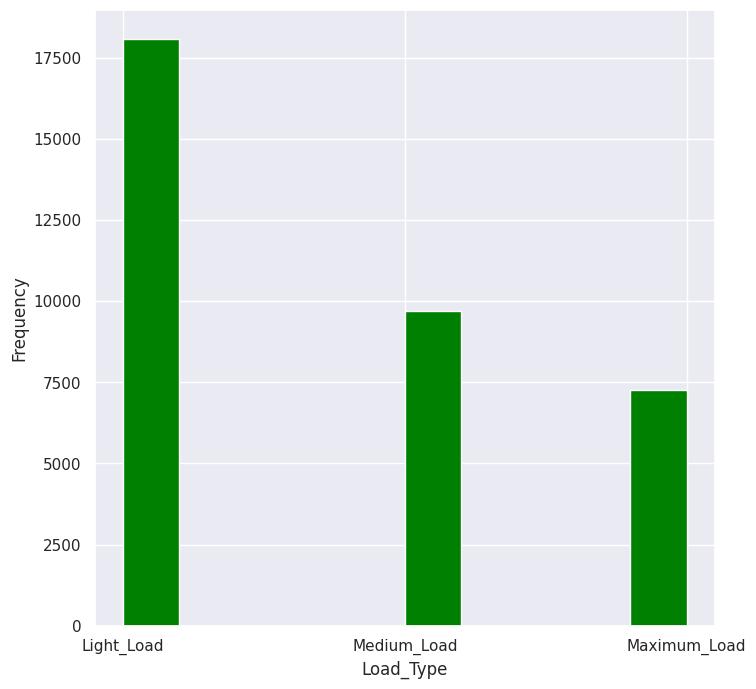

In [ ]:

sns.set(rc={'figure.figsize':(8,8)})
plt.hist(data['Load_Type'],color='green')
plt.xlabel('Load_Type')
plt.ylabel('Frequency')
plt.show()

APPLYING ML ALGORITHMS

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np # Ensure numpy is imported

# create X and y
# X = df_combined = data.drop(['Usage_kWh'], axis=1)
X = df.drop(['Usage'], axis=1)
y = df['Usage']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.concat([data, data_dummies], axis=1)

In [ ]:
data = data.drop(['Day_of_week','date'], axis=1)

In [ ]:
data

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Light_Load,False,False
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Light_Load,False,False
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Light_Load,False,False
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Light_Load,False,False
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Light_Load,False,False
...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Light_Load,False,False
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Light_Load,False,False
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Light_Load,False,False
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Light_Load,False,False


In [ ]:
feature_cols = ['LaRP','LeRP','CO2','LaPF','LePF','NSM','WeekStatus','MaxL','MinL']
X = df[feature_cols]
Y = df[['Usage']]

lm2 = LinearRegression()
lm2.fit(X,Y)

print(lm2.intercept_)
print(lm2.coef_)

[-10.88144522]
[[ 3.09627643e-01  6.84766879e-02  1.66580133e+03  1.15756436e-01
   5.72007872e-02 -2.73549176e-06  2.54570583e-02  1.24767219e+00
   1.68928284e+00]]


In [ ]:
lm2.predict([[50, 1, 25, 0, 0, 0, 0, 0,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41649.70165904]])

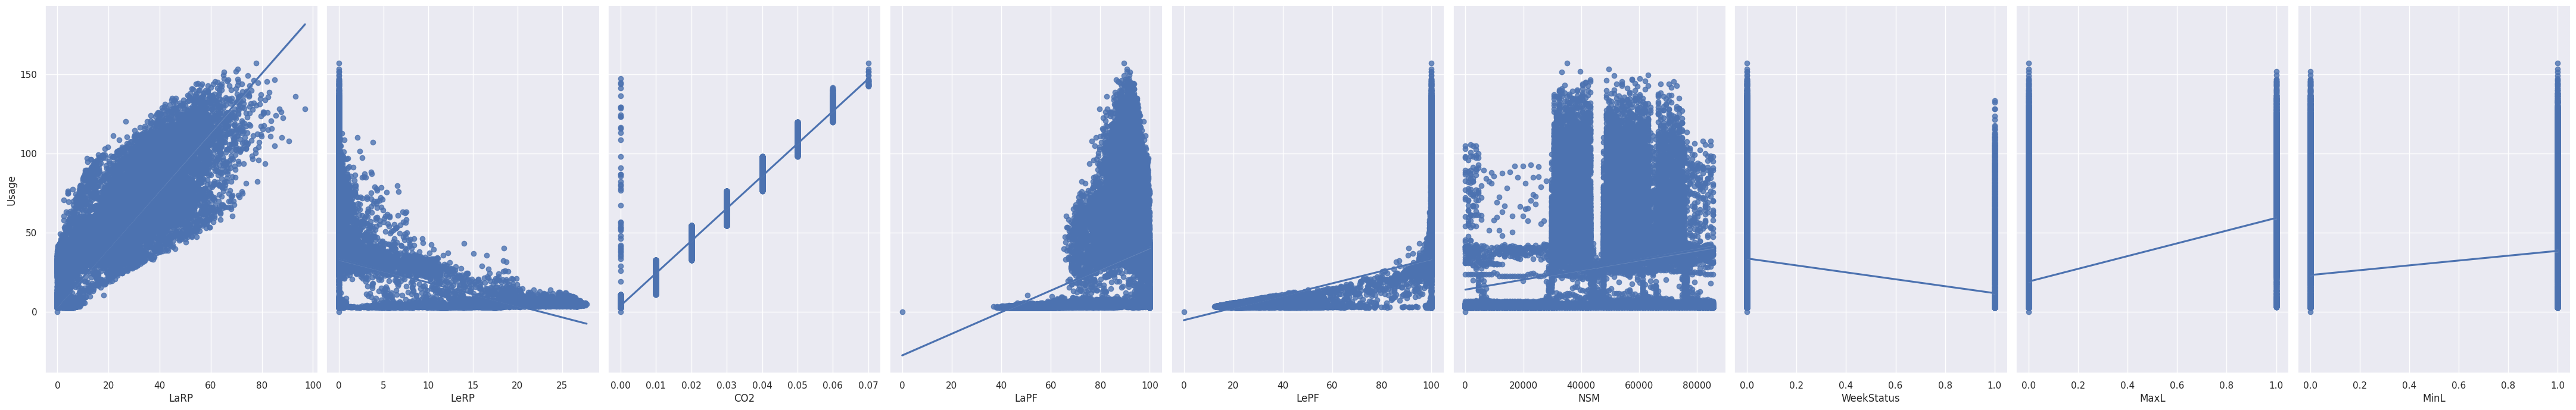

In [ ]:
sns.pairplot(df, x_vars=['LaRP','LeRP','CO2','LaPF','LePF','NSM','WeekStatus','MaxL','MinL'], y_vars=['Usage'], height=7, aspect=0.7, kind='reg')

In [ ]:
lm2.score(X,Y)

0.9803927328102917

In [ ]:
{i:j for i,j in zip(feature_cols, lm2.coef_)}

{'LaRP': array([ 3.09627643e-01,  6.84766879e-02,  1.66580133e+03,  1.15756436e-01,
         5.72007872e-02, -2.73549176e-06,  2.54570583e-02,  1.24767219e+00,
         1.68928284e+00])}

In [ ]:
x = df[['LaRP','LeRP','CO2','LaPF','LePF','NSM','WeekStatus','MaxL','MinL']]
y = df[['Usage']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, Y_train)
Y_pred = lm2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

4.347817337331774


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9831195564824663

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 46)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model=KNeighborsRegressor(n_neighbors=5)

In [ ]:
model.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([[98.86 ],
       [ 5.056],
       [ 4.248],
       ...,
       [55.65 ],
       [ 3.24 ],
       [58.42 ]])

In [ ]:
# Iterate through the columns and create a DataFrame for each region
for col in Y_test.columns:
    knn = pd.DataFrame({'Predicted': Y_pred[:, Y_test.columns.get_loc(col)], 'Actual': Y_test[col]})
    print(f"Comparison for {col}:")
    display(knn.head()) # Display the head of each comparison DataFrame

Comparison for Usage:


,Predicted,Actual
21734,98.860,101.02
5574,5.056,5.98
5663,4.248,5.29
24094,2.656,2.84
8838,3.694,3.71


In [ ]:
knn

,Predicted,Actual
21734,98.860,101.02
5574,5.056,5.98
5663,4.248,5.29
24094,2.656,2.84
8838,3.694,3.71
...,...,...
4934,81.440,80.78
25635,2.972,2.63
6892,55.650,57.31
7405,3.240,3.56


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.9833486641175362

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(Y_test, Y_pred)

1.775798896499239

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred)

18.312176791856928

In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(4.27927292794663)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test, Y_pred)
print(mape)
mape = mape*100
mape

0.06610347448931399


6.610347448931399

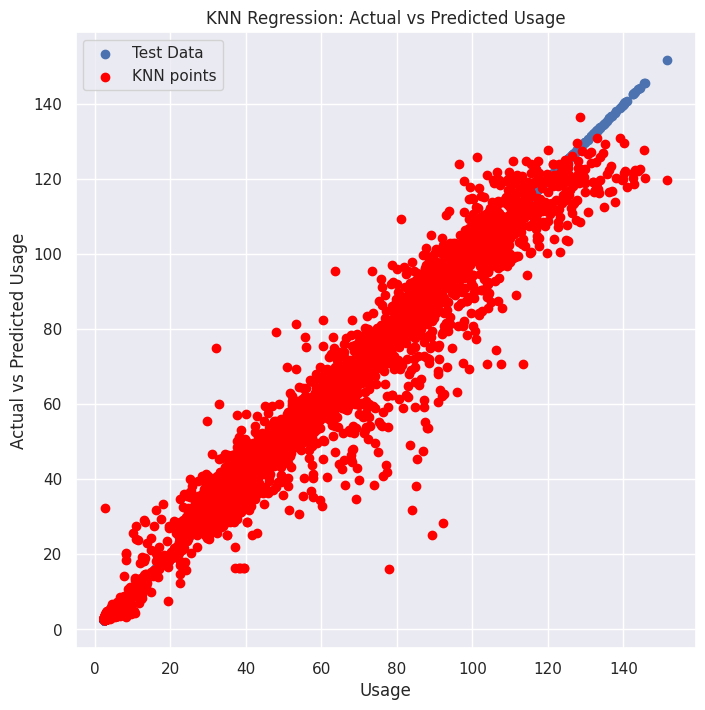

In [ ]:
plt.scatter(Y_test, Y_test, label='Test Data')
plt.scatter(Y_test, Y_pred, color='red', linewidth=1, label='KNN points')
plt.xlabel('Usage')
plt.ylabel('Actual vs Predicted Usage')
plt.title('KNN Regression: Actual vs Predicted Usage')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Features and target
X = df.drop(columns=['Usage'])
y = df['Usage']

# One-hot encode categorical features
# X = pd.get_dummies(X, drop_first=True) # This is not needed as 'Load_Type' columns are already one-hot encoded

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the SVR model
svm_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_reg.fit(X_train, y_train)

# Predictions
y_pred = svm_reg.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 1.647428687078419
R²: 0.9985507202310593


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Features and target
X = df.drop(columns=['Usage'])
y = df['Usage']

# One-hot encode categorical variables
# X = pd.get_dummies(X, drop_first=True) # This is not needed as 'Load_Type' columns are already one-hot encoded

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred = tree_reg.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 12.426114438021456
R²: 0.9890684699114324


In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=8, min_samples_split=5, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=5, random_state=42)

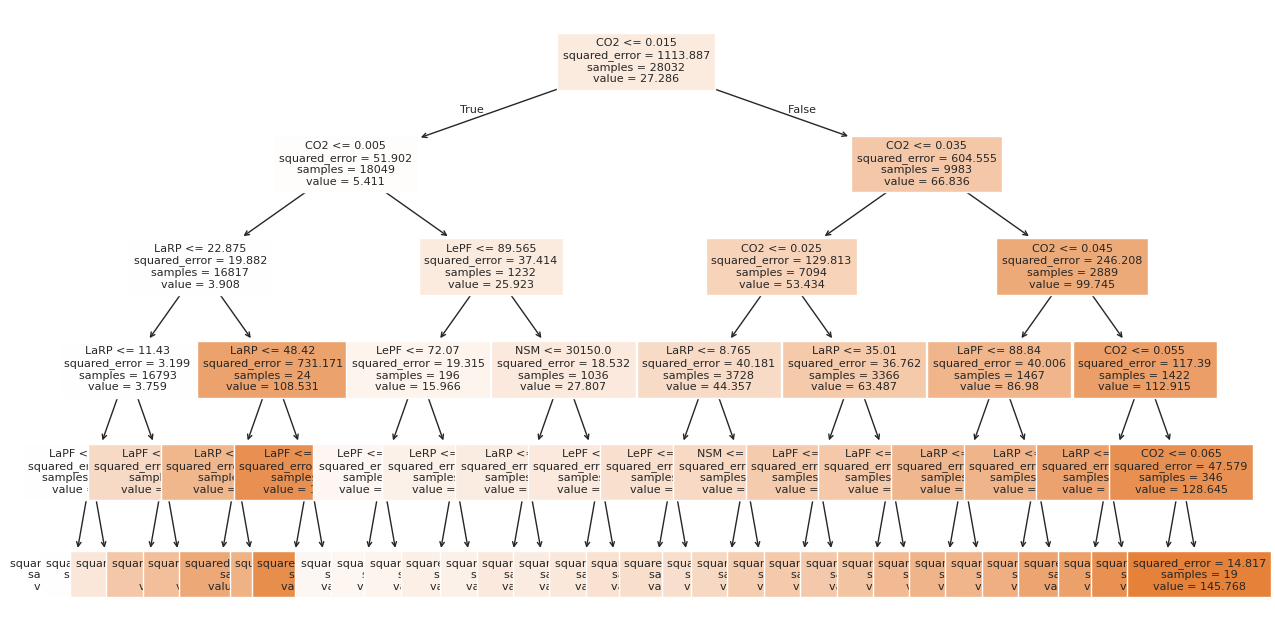

In [ ]:
# Train the Decision Tree before plotting
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)

# Now plot
import sklearn.tree as tree
plt.figure(figsize=(15,8))
tree.plot_tree(tree_reg, feature_names=X.columns, filled=True, fontsize=8)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Features and target
X = df.drop(columns=['Usage'])
y = df['Usage']

# One-hot encode categorical variables
# X = pd.get_dummies(X, drop_first=True) # This is not needed as 'Load_Type' columns are already one-hot encoded

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred = rf_reg.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 3.5962357962481857
R²: 0.9968363111406746


In [ ]:
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)


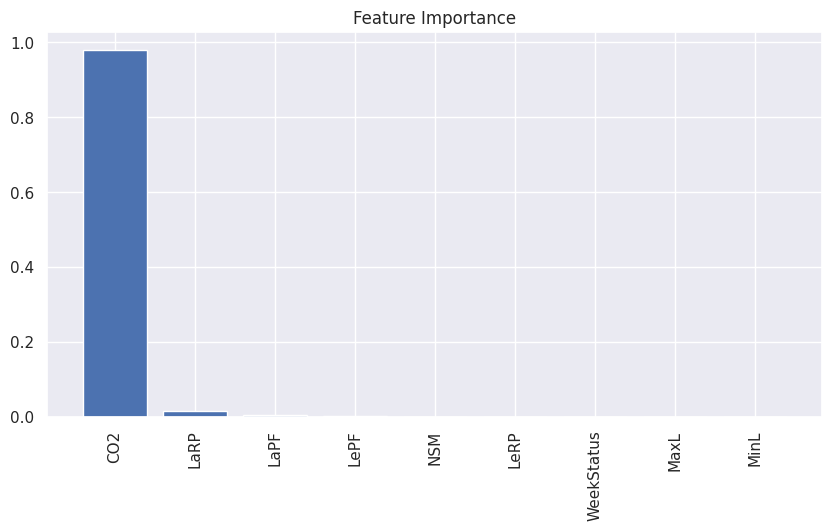

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
X = df.drop(columns=['Usage'])
y = df['Usage']
# X = pd.get_dummies(X, drop_first=True) # This is not needed as 'Load_Type' columns are already one-hot encoded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train, y_train)  # <-- REQUIRED

# Now get feature importance
importances = rf_reg.feature_importances_
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(10,5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importance")
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Features and target
X = df.drop(columns=['Usage'])
y = df['Usage']

# One-hot encode categorical features
# X = pd.get_dummies(X, drop_first=True) # This is not needed as 'Load_Type' columns are already one-hot encoded

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train AdaBoost regressor (using Decision Tree as base estimator)
base_estimator = DecisionTreeRegressor(max_depth=5, random_state=42)
ada_reg = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada_reg.fit(X_train, y_train)

# Predictions
y_pred = ada_reg.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 11.9372245546774
R²: 0.9894985572485826


In [ ]:
ada_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=8, random_state=42),
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)


In [ ]:
# Create AdaBoost model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=8, random_state=42),
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

# Train the model
ada_reg.fit(X_train, y_train)  # <-- Fitting step

# Predict
y_pred = ada_reg.predict(X_test)


In [ ]:
!pip install xgboost


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


In [ ]:
# Features and target
X = df.drop(columns=['Usage'])
y = df['Usage']

# Encode categorical variables
# X = pd.get_dummies(X, drop_first=True) # This is not needed as 'Load_Type' columns are already one-hot encoded

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_reg = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 1.1787963056203816
R²: 0.9989629865918703


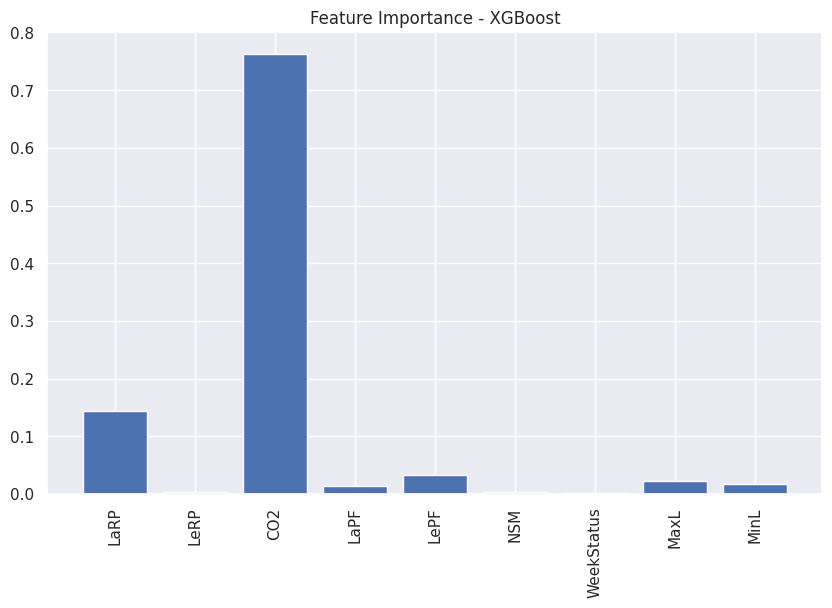

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(range(len(xgb_reg.feature_importances_)), xgb_reg.feature_importances_)
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.title("Feature Importance - XGBoost")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error # Import mean_absolute_error
import numpy as np

split_ratios = [0.25, 0.2, 0.3, 0.4]

for ratio in split_ratios:
    x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(X, y, test_size=ratio, random_state=1)
    rf_model = RandomForestRegressor()
    rf_model.fit(x_train_1, y_train_1)
    Rf_y_pred = rf_model.predict(x_test_1)
    RF_nae = mean_absolute_error(y_test_1, Rf_y_pred)
    RF_R2 = r2_score(y_test_1, Rf_y_pred)
    print(f"Split Ratio: {ratio}")
    print(f"Mean Absolute Error: {RF_nae}")
    print(f"R-squared: {RF_R2}")

Split Ratio: 0.25
Mean Absolute Error: 0.31006883561643817
R-squared: 0.999207883257785
Split Ratio: 0.2
Mean Absolute Error: 0.2998070776255704
R-squared: 0.999245190972098
Split Ratio: 0.3
Mean Absolute Error: 0.32688684360730563
R-squared: 0.9991246944458759
Split Ratio: 0.4
Mean Absolute Error: 0.35678774257990814
R-squared: 0.999027733887936
